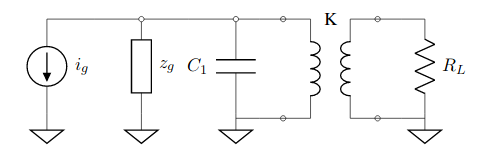

In [1]:
import numpy as np
from IPython.display import Image
Image(filename= "fig/trafo.png",width=450) 

Supongamos que es necesitamos un transformador para un circuito sintonizado en $10 MHz$ con $Q_c = 10$, empleando el mismo circuito del ejercicio 2 de la guía.
La resistencia de carga es de $10 \Omega$ y la del generador es de $100 \Omega$.

El transformador en este caso debe presentar en sus bornes del bobinado primario $100 \Omega$ a $10 \Omega$.

$$\frac{N_1}{N_2} = N = \sqrt{\frac{R_L^{'}}{R_L}} $$

donde $N_1$ es la cantidad de espiras del primario, $N_2$ es la cantidad de espiras del secundario, $R_L^{'}$ es la resistencia de carga vista desde los bornes del primario ($100 \Omega$) y $R_L$ ($10 \Omega$).



In [2]:
RL = 10
RLp= 100
N = (RLp/RL)**.5

print( 'N= {:1.3}'.format(N) )

N= 3.16


La resistencia total que carga al circuito sintonizado LC es de $50 \Omega$  (formada por los  $100 \Omega$ de la fuente en paralelo con los $100 \Omega$ que presenta el transformador).
Dado que no se tienen en cuenta las perdidas, el $Q_o = \inf$.

Entonces, la ecuación que nos permite calcular el indictor:

$$\frac{1}{Q_c} = \frac{1}{Q_o} + \frac{w_o \cdot L}{R_{ext}} $$

$$\frac{1}{L} =   \frac{w_o \cdot Q_c}{R_{ext}} $$


$$ L =  \frac{50 \Omega}{ 10 \cdot (2 \cdot \pi \cdot 10 MHz)} $$

In [3]:
fo = 10e6
Qc = 10
Rg = 100
Rext = RLp*Rg/(RLp+Rg)

L = Rext / (Qc * (2*np.pi*fo)) 

print( 'Rext = {:1.3f} ohms'.format(Rext))
print( 'L = {:1.3e} Hy'.format(L))

Rext = 50.000 ohms
L = 7.958e-08 Hy


Hasta aca conocemos la relación de espiras del transformador y el valor del indutor de este transformador. 

Si necesitamos simular este dispositivo empleando Spice, necesitamos conocer el valor de inductancia del secundario. Para esto podemos emplear la relación de espiras (esta ecuación en valida para K=1). 

$$ L_s =  \frac{L}{N^2} $$


In [4]:
Ls =   L / N**2 

print( 'Ls = {:1.3e} Hy'.format(Ls))

Ls = 7.958e-09 Hy


Falta ahora calcular el valor de capacidad del capacitor.

$$ w_o^2 = \frac{1}{L\cdot C}$$

$$ C = \frac{1}{L\cdot (w_o^2 )}$$

In [5]:
C = 1/ L / (2*np.pi*fo)**2 

print( 'L = {:1.3e} Hy'.format(L))
print( 'C = {:1.3e} F'.format(C))

L = 7.958e-08 Hy
C = 3.183e-09 F


### Simulando con LTSpice

A continuación la simulación del circuito calculado y la respuesta. 

Se midió la tensión sobre el primario, se buscó el ancho de banda para $-3 dB$ y se obtuvo como resultado $BW = 1 MHz$.

Por lo tanto, 

$$ Q_c = \frac{f_o}{BW} = \frac{10 MHz}{1 MHz} = 10 $$ 

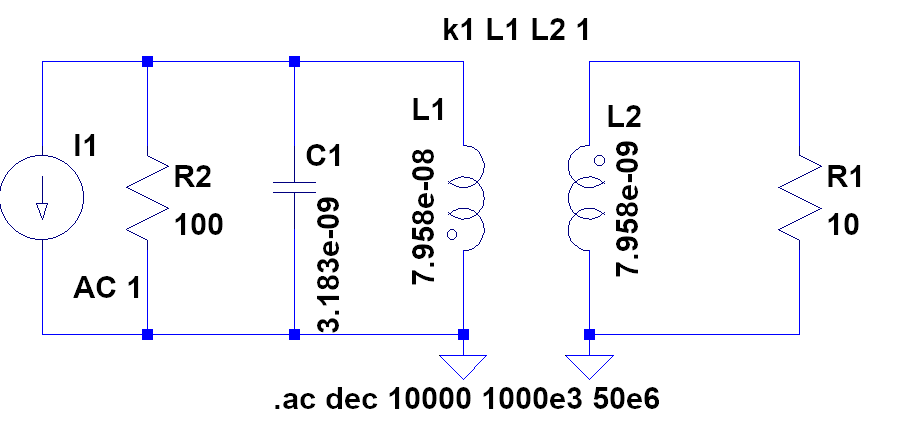

In [6]:
Image(filename= "fig/trafospice.png",width=450) 

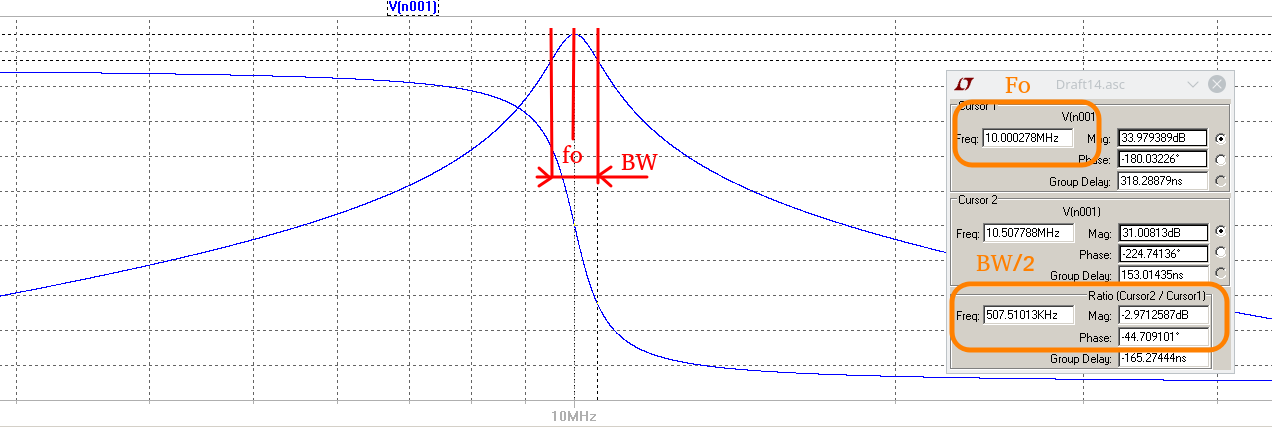

In [7]:
Image(filename= "fig/trafosimu.png",width=850) 

In [8]:
print()